Connected to sam-adapter (Python 3.8.18)

In [9]:
import geopandas as gpd
import rasterio
from shapely.geometry import Polygon

mask = gpd.read_file("/home/kandelaki/bt/data_40/raw_data/munich_geojson/PV_MUC_20220506_1_Florian.geojson")
tif = rasterio.open("/home/kandelaki/bt/data_20/preprocessed_not_split/images/NW00603.tif")



In [10]:
tif.bounds
left, bottom, right, top = tif.bounds[0], tif.bounds[1], tif.bounds[2], tif.bounds[3]
polygon_out_of_tile = Polygon.from_bounds(xmin = left, ymin = bottom, xmax = right, ymax = top)
polygon_out_of_tile_geo = gpd.GeoSeries(data = polygon_out_of_tile, crs=mask.crs)

In [11]:
geom = gpd.GeoSeries(data=mask["geometry"], crs=mask.crs)
geom

0       MULTIPOLYGON (((697651.689 5344469.226, 697660...
1       MULTIPOLYGON (((697663.464 5344462.847, 697664...
2       MULTIPOLYGON (((697669.148 5344458.793, 697669...
3       MULTIPOLYGON (((697670.587 5344471.193, 697675...
4       MULTIPOLYGON (((697682.387 5344456.923, 697677...
                              ...                        
1794    MULTIPOLYGON (((697750.678 5328106.913, 697766...
1795    MULTIPOLYGON (((697763.560 5328114.332, 697763...
1796    MULTIPOLYGON (((697770.462 5328118.318, 697778...
1797    MULTIPOLYGON (((697773.046 5328114.073, 697779...
1798    MULTIPOLYGON (((697690.808 5328090.672, 697696...
Name: geometry, Length: 1799, dtype: geometry

In [12]:
import folium

m = mask.explore(
)
polygon_out_of_tile_geo.explore(
    m=m, 
)

folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m  # show map

In [13]:
df1 = gpd.GeoDataFrame({'geometry': polygon_out_of_tile_geo})
df2 = gpd.GeoDataFrame({'geometry': geom})
intersection = gpd.overlay(df1, df2, how='intersection')
intersection.explore()

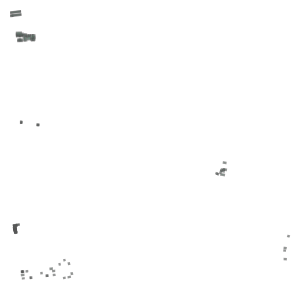

In [14]:
import shapely.ops
unioned = shapely.ops.unary_union(intersection["geometry"])
unioned


In [15]:
import rasterio.transform
import rasterio.features
import numpy as np

width, height = 12060, 12060

# Create an empty NumPy array to store the binary mask
mask = np.zeros((height, width), dtype=np.uint8)

minx, miny, maxx, maxy = tif.bounds


transform = rasterio.transform.from_bounds(minx, miny, maxx, maxy, width, height)
mask = rasterio.features.geometry_mask([unioned], transform=transform, invert=False, out_shape=(height, width))

np.save('binary_mask.npy', mask)


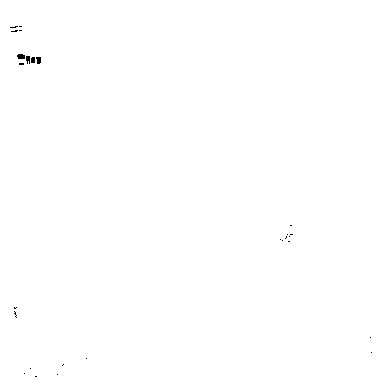

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Load the binary mask from the NumPy file
mask = np.load('binary_mask.npy')

# Get the shape of the mask
height, width = mask.shape

# Set the extent based on the shape of the mask
extent = (0, width, 0, height)

# Plot the binary mask with exact extent
plt.imshow(mask, cmap='gray', extent=extent, interpolation='nearest')
plt.axis('off')

# Display the plot (optional)
plt.show()



In [17]:
mask.shape
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])